<a href="https://colab.research.google.com/github/nityanandkore/Python-Study-Repo/blob/master/DataCamp-%20Cleaning%20Data%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and viewing your data
In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.
Your first task is to load this dataset into a DataFrame and then inspect it using the .head() and .tail() methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way. 
The .shape and .columns attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, df_subset, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.
Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

**Instructions**

Import pandas as pd.
Read 'dob_job_application_filings_subset.csv' into a DataFrame called df.
Print the head and tail of df.
Print the shape of df and its columns. Note: .shape and .columns are attributes, not methods, so you don't need to follow these with parentheses ().
Hit 'Submit Answer' to view the results! Notice the suspicious number of 0 values. Perhaps these represent missing data.

In [0]:
!rm -rf Python-Study-Repo
!git clone https://github.com/nityanandkore/Python-Study-Repo.git

Cloning into 'Python-Study-Repo'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 45 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [0]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('Python-Study-Repo/_datasets/dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Create a subset of df

df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]



# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       Job #  ...              DOBRunDate
0  121577873  ...  04/26/2013 12:00:00 AM
1  520129502  ...  04/26/2013 12:00:00 AM
2  121601560  ...  04/26/2013 12:00:00 AM
3  121601203  ...  04/26/2013 12:00:00 AM
4  121601338  ...  04/26/2013 12:00:00 AM

[5 rows x 82 columns]
           Job #  ...              DOBRunDate
12841  520143988  ...  06/13/2013 12:00:00 AM
12842  121613833  ...  06/13/2013 12:00:00 AM
12843  121681260  ...  06/13/2013 12:00:00 AM
12844  320771704  ...  06/13/2013 12:00:00 AM
12845  520143951  ...  06/13/2013 12:00:00 AM

[5 rows x 82 columns]
(12846, 82)
Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpi

# Further diagnosis
In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful .info() method. 
The .info() method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the 'Initial Cost' and 'Total Est. Fee' columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them. 
The full DataFrame df and the subset DataFrame df_subset have been pre-loaded. Your task is to use the .info() method on these and analyze the results.

**Instructions**
100 XP
Print the info of df.
Print the info of the subset dataframe, df_subset

In [0]:
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

Excellent! Notice that the columns 'Initial Cost' and 'Total Est. Fee' are of type object. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. You saw in the previous exercise that there are also a lot of 0 values. Given the amount of data that is missing in the full dataset, it's highly likely that these 0 values represent missing data.

In [0]:
df_subset.columns

Index(['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee',
       'Existing Zoning Sqft', 'Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height'],
      dtype='object')

# Calculating summary statistics
You'll now use the .describe() method to calculate summary statistics of your data.
In this exercise, an adapted DataFrame has been prepared for you to inspect, with fewer columns to increase readability in the IPython Shell.
This adapted DataFrame has been pre-loaded as df. Your job is to use the .describe() method on it in the IPython Shell and select the statement below that is False.

In [0]:
In [1]: df.describe()     ### Dont run this block as its internal df created in DatCamp
Out[1]: 
       Street Frontage  Existing Height  Proposed Height
count     12846.000000     12846.000000     12846.000000
mean          3.069360        94.022809        94.917562
std          37.246034       146.917360       146.580666
min           0.000000         0.000000         0.000000
25%           0.000000        20.000000        21.000000
50%           0.000000        45.000000        45.000000
75%           0.000000       105.000000       107.000000
max        3160.000000      4200.000000      4200.000000


,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


In [0]:
The standard deviation of 'Street Frontage' is 11.874080

# Frequency counts for categorical data
As you've seen, .describe() can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the .value_counts() method, which returns the frequency counts for each unique value in a column!
This method also has an optional parameter called dropna which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to False so if there are missing values in a column, it will give you the frequency counts.
In this exercise, you're going to look at the 'Borough', 'State', and 'Site Fill' columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the 'State' column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

**Instructions**

Print the value counts for:
The 'Borough' column.
The 'State' column.
The 'Site Fill' column.

In [11]:
# Print the value counts for 'Borough'

print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
MD        7
DC        7
MA        6
GA        6
KS        6
VA        5
CO        4
SC        3
WI        3
AZ        3
MN        3
UT        2
NC        2
RI        2
WA        1
NM        1
VT        1
IN        1
MI        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


Fantastic work! Notice how not all values in the 'State' column are NY. This is an interesting find, as this data is supposed to consist of applications filed in NYC. Curiously, all the 'Borough' values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the 'Site Fill' column, you may or may not need to recode the NOT APPLICABLE values to NaN in your final analysis.

# Visualizing single variables with histograms
Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.
You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is 'Existing Zoning Sqft'.
The .plot() method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - kind='hist', for example, plots a histogram.
In the IPython Shell, begin by computing summary statistics for the 'Existing Zoning Sqft' column using the .describe() method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments logx=True or logy=True can be passed in to .plot() depending on which axis you want to rescale.
Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

**Instructions**

Import matplotlib.pyplot as plt.
Create a histogram of the 'Existing Zoning Sqft' column. Rotate the axis labels by 70 degrees and use a log scale for both axes.
Display the histogram using plt.show()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


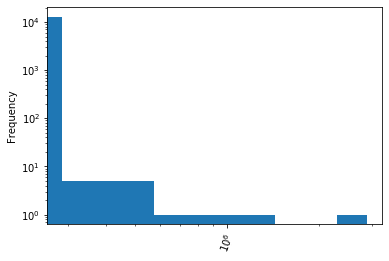

In [12]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()


Excellent work! While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.

# Visualizing multiple variables with boxplots
Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical. 
In this exercise, your job is to use a boxplot to compare the 'initial_cost' across the different values of the 'Borough' column. The pandas .boxplot() method is a quick way to do this, in which you have to specify the column and by parameters. Here, you want to visualize how 'initial_cost' varies by 'Borough'.
pandas and matplotlib.pyplot have been imported for you as pd and plt, respectively, and the DataFrame has been pre-loaded as df.

**Instructions**

Using the .boxplot() method of df, create a boxplot of 'initial_cost' across the different values of 'Borough'.
Display the plot.

KeyError: ignored

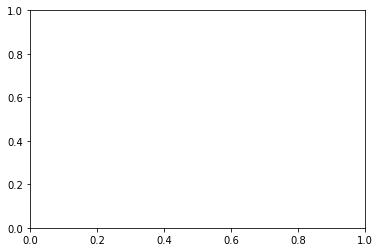

In [13]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()


Great work! You can see the 2 extreme outliers are in the borough of Manhattan. An initial guess could be that since land in Manhattan is extremely expensive, these outliers may be valid data points. Again, further investigation is needed to determine whether or not you can drop or keep those points in your data.

# Visualizing multiple variables with scatter plots
Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.
In this exercise, your job is to make a scatter plot with 'initial_cost' on the x-axis and the 'total_est_fee' on the y-axis. You can do this by using the DataFrame .plot() method with kind='scatter'. You'll notice right away that there are 2 major outliers shown in the plots.
Since these outliers dominate the plot, an additional DataFrame, df_subset, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.
When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.

**Instructions**

Using df, create a scatter plot (kind='scatter') with 'initial_cost' on the x-axis and the 'total_est_fee' on the y-axis. Rotate the x-axis labels by 70 degrees.
Create another scatter plot exactly as above, substituting df_subset in place of df

KeyError: 'initial_cost'

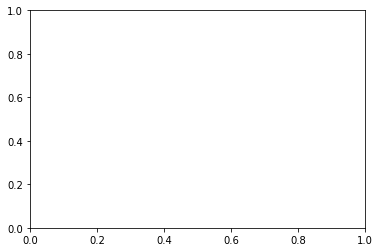

In [0]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

Excellent work! In general, from the second plot it seems like there is a strong correlation between 'initial_cost' and 'total_est_fee'. In addition, take note of the large number of points that have an 'initial_cost' of 0. It is difficult to infer any trends from the first plot because it is dominated by the outliers.

# Tidying data for analysis

# Recognizing tidy data
For data to be tidy, it must have:
Each column contains exactly one variable.
Each row contains exactly one observation.
However, what constitutes a unique observation depends on your use case. As a data scientist, you'll encounter data that is represented in a variety of different ways, so it is important to be able understand and describe the structure of your data.
In this exercise, two example datasets have been pre-loaded into the DataFrames df1 and df2. They contain the same data, but structured in different ways. Your job is to explore these further in the IPython Shell and answer the question below.
A note before proceeding. In the rest of this course, you will frequently be asked to explore the structure of DataFrames in the IPython Shell prior to performing different operations on them. Doing this will not only strengthen your comprehension of the data cleaning concepts covered in this course, but will also help you realize and take advantage of the relationship between working in the Shell and in the script.
Which of the following statements is true?

In both datasets, Date identifies each observation.

Correct! Both formats are tidy for different reasons, one is focused on individual sensor measurements, and the other is focused on daily measurements. When you get data into a tidy format it's easier to tranform it to whatever suits your needs.

In [15]:
import pandas as pd
df1=pd.read_csv("Python-Study-Repo/_datasets/airquality.csv")
df1.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


# Reshaping your data using melt
Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently (e.g., this could make it easier to plot values).
In this exercise, you will practice melting a DataFrame using pd.melt(). There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no value_vars are provided, all columns not set in the id_vars will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.
The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R, Wind, and Temp columns into rows. Later in this chapter, you'll learn how to bring this melted DataFrame back into a tidy form.

**Instructions**
100 XP
Print the head of airquality.
Use pd.melt() to melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows. Do this by using id_vars to the column you do not wish to melt: 'Date'.
Print the head of airquality_melt

In [16]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars='Date')

# Print the head of airquality_melt
print(airquality_melt.head())

NameError: ignored

In [0]:
Date  Ozone  Solar.R  Wind  Temp
0 1973-05-01   41.0    190.0   7.4    67
1 1973-05-02   36.0    118.0   8.0    72
2 1973-05-03   12.0    149.0  12.6    74
3 1973-05-04   18.0    313.0  11.5    62
4 1973-05-05    NaN      NaN  14.3    56
        Date variable  value
0 1973-05-01    Ozone   41.0
1 1973-05-02    Ozone   36.0
2 1973-05-03    Ozone   12.0
3 1973-05-04    Ozone   18.0
4 1973-05-05    Ozone    NaN

<script.py> output:
            Date  Ozone  Solar.R  Wind  Temp
    0 1973-05-01   41.0    190.0   7.4    67
    1 1973-05-02   36.0    118.0   8.0    72
    2 1973-05-03   12.0    149.0  12.6    74
    3 1973-05-04   18.0    313.0  11.5    62
    4 1973-05-05    NaN      NaN  14.3    56
            Date variable  value
    0 1973-05-01    Ozone   41.0
    1 1973-05-02    Ozone   36.0
    2 1973-05-03    Ozone   12.0
    3 1973-05-04    Ozone   18.0
    4 1973-05-05    Ozone    NaN

Well done! This exercise demonstrates that melting a DataFrame is not always appropriate if you want to make it tidy. You may have to perform other transformations depending on how your data is represented.

# Customizing melted data
When melting DataFrames, it would be better to have column names more meaningful than variable and value (the default names used by pd.melt()).
The default names may work in certain situations, but it's best to always have data that is self explanatory.
You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter. You will now practice doing exactly this. Pandas as pd and the DataFrame airquality has been pre-loaded for you.

**Instructions**
100 XP
Print the head of airquality.
Melt the columns of airquality with the default variable column renamed to 'measurement' and the default value column renamed to 'reading'. You can do this by specifying, respectively, the var_name and value_name parameters.
Print the head of airquality_melt

In [0]:
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars='Date', var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

In [0]:
Date  Ozone  Solar.R  Wind  Temp
0 1973-05-01   41.0    190.0   7.4    67
1 1973-05-02   36.0    118.0   8.0    72
2 1973-05-03   12.0    149.0  12.6    74
3 1973-05-04   18.0    313.0  11.5    62
4 1973-05-05    NaN      NaN  14.3    56
        Date measurement  reading
0 1973-05-01       Ozone     41.0
1 1973-05-02       Ozone     36.0
2 1973-05-03       Ozone     12.0
3 1973-05-04       Ozone     18.0
4 1973-05-05       Ozone      NaN





Course Outline








Great work! The DataFrame is more informative now. In the next video, you'll learn about pivoting, which is the opposite of melting. You'll then be able to convert this DataFrame back into its original, tidy, form!

# Pivot data
Pivoting data is the opposite of melting it. Remember the tidy form that the airquality DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the .pivot_table() method!
While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.
.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). The melted DataFrame airquality_melt has been pre-loaded for you.

**Instructions**

100 XP
Print the head of airquality_melt.
Pivot airquality_melt by using .pivot_table() with the rows indexed by 'Date', the columns indexed by 'measurement', and the values populated with 'reading'.
Print the head of airquality_pivot

In [0]:
# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index='Date', columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())


In [0]:
<script.py> output:
            Date measurement  reading
    0 1973-05-01       Ozone     41.0
    1 1973-05-02       Ozone     36.0
    2 1973-05-03       Ozone     12.0
    3 1973-05-04       Ozone     18.0
    4 1973-05-05       Ozone      NaN
    measurement  Ozone  Solar.R  Temp  Wind
    Date                                   
    1973-05-01    41.0    190.0  67.0   7.4
    1973-05-02    36.0    118.0  72.0   8.0
    1973-05-03    12.0    149.0  74.0  12.6
    1973-05-04    18.0    313.0  62.0  11.5
    1973-05-05     NaN      NaN  56.0  14.3

Excellent work! Notice that the pivoted DataFrame does not actually look like the original DataFrame. In the next exercise, you'll turn this pivoted DataFrame back into its original form.

# Resetting the index of a DataFrame

After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.
What you got back instead was a pandas DataFrame with a hierarchical index (also known as a MultiIndex).
Hierarchical indexes are covered in depth in Manipulating DataFrames with pandas. In essence, they allow you to group columns or rows by another variable - in this case, by 'Date'. 
There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index(). Dan didn't show you how to use this method in the video, but you're now going to practice using it in this exercise to get back the original DataFrame from airquality_pivot, which has been pre-loaded.

**Instructions**

100 XP
Print the index of airquality_pivot by accessing its .index attribute. This has been done for you.
Reset the index of airquality_pivot using its .reset_index() method.
Print the new index of airquality_pivot_reset.
Print the head of airquality_pivot_reset

In [0]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())


In [0]:
DatetimeIndex(['1973-05-01', '1973-05-02', '1973-05-03', '1973-05-04', '1973-05-05', '1973-05-06', '1973-05-07', '1973-05-08', '1973-05-09', '1973-05-10',
               ...
               '1973-09-21', '1973-09-22', '1973-09-23', '1973-09-24', '1973-09-25', '1973-09-26', '1973-09-27', '1973-09-28', '1973-09-29', '1973-09-30'],
              dtype='datetime64[ns]', name='Date', length=153, freq=None)
RangeIndex(start=0, stop=153, step=1)
measurement       Date  Ozone  Solar.R  Temp  Wind
0           1973-05-01   41.0    190.0  67.0   7.4
1           1973-05-02   36.0    118.0  72.0   8.0
2           1973-05-03   12.0    149.0  74.0  12.6
3           1973-05-04   18.0    313.0  62.0  11.5
4           1973-05-05    NaN      NaN  56.0  14.3

<script.py> output:
    DatetimeIndex(['1973-05-01', '1973-05-02', '1973-05-03', '1973-05-04', '1973-05-05', '1973-05-06', '1973-05-07', '1973-05-08', '1973-05-09', '1973-05-10',
                   ...
                   '1973-09-21', '1973-09-22', '1973-09-23', '1973-09-24', '1973-09-25', '1973-09-26', '1973-09-27', '1973-09-28', '1973-09-29', '1973-09-30'],
                  dtype='datetime64[ns]', name='Date', length=153, freq=None)
    RangeIndex(start=0, stop=153, step=1)
    measurement       Date  Ozone  Solar.R  Temp  Wind
    0           1973-05-01   41.0    190.0  67.0   7.4
    1           1973-05-02   36.0    118.0  72.0   8.0
    2           1973-05-03   12.0    149.0  74.0  12.6
    3           1973-05-04   18.0    313.0  62.0  11.5
    4           1973-05-05    NaN      NaN  56.0  14.3

# Pivoting duplicate values

So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.
Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as airquality_dup. In addition, the airquality_melt DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their .shape attributes to confirm the duplicate rows present in airquality_dup.
You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().
NumPy and pandas have been imported as np and pd respectively.

**Instructions**

100 XP

Instructions
100 XP
Pivot airquality_dup by using .pivot_table() with the rows indexed by 'Date', the columns indexed by 'measurement', and the values populated with 'reading'. Use np.mean for the aggregation function. 
Print the head of airquality_pivot.
Flatten airquality_pivot by resetting its index.
Print the head of airquality_pivot and then the original airquality DataFrame to compare their structure.

In [0]:
# Pivot table the airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index='Date', columns='measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot.head())

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

In [0]:
In [3]: airquality_dup.shape
Out[3]: (1224, 3)

In [4]: airquality_melt.shape
Out[4]: (612, 3)

In [5]: # Pivot table the airquality_dup: airquality_pivot
        airquality_pivot = airquality_dup.pivot_table(index='Date', columns='measurement', values='reading', aggfunc=np.mean)
        
        # Print the head of airquality_pivot before reset_index
        print(airquality_pivot.head())
        
        # Reset the index of airquality_pivot
        airquality_pivot = airquality_pivot.reset_index()
        
        # Print the head of airquality_pivot
        print(airquality_pivot.head())
        
        # Print the head of airquality
        print(airquality.head())
measurement  Ozone  Solar.R  Temp  Wind
Date                                   
1973-05-01    41.0    190.0  67.0   7.4
1973-05-02    36.0    118.0  72.0   8.0
1973-05-03    12.0    149.0  74.0  12.6
1973-05-04    18.0    313.0  62.0  11.5
1973-05-05     NaN      NaN  56.0  14.3
measurement       Date  Ozone  Solar.R  Temp  Wind
0           1973-05-01   41.0    190.0  67.0   7.4
1           1973-05-02   36.0    118.0  72.0   8.0
2           1973-05-03   12.0    149.0  74.0  12.6
3           1973-05-04   18.0    313.0  62.0  11.5
4           1973-05-05    NaN      NaN  56.0  14.3
        Date  Ozone  Solar.R  Wind  Temp
0 1973-05-01   41.0    190.0   7.4    67
1 1973-05-02   36.0    118.0   8.0    72
2 1973-05-03   12.0    149.0  12.6    74
3 1973-05-04   18.0    313.0  11.5    62
4 1973-05-05    NaN      NaN  14.3    56

Fantastic! The default aggregation function used by .pivot_table() is np.mean(). So you could have pivoted the duplicate values in this DataFrame even without explicitly specifying the aggfunc parameter.

# Splitting a column with .str

The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.
In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.
Begin by printing the columns of tb in the IPython Shell using its .columns attribute, and take note of the problematic column.

**Instructions**
100 XP
Melt tb keeping 'country' and 'year' fixed.
Create a 'gender' column by slicing the first letter of the variable column of tb_melt.
Create an 'age_group' column by slicing the rest of the variable column of tb_melt.
Print the head of tb_melt. This has been done for you, so hit 'Submit Answer' to see the results!

In [0]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())


In [0]:

<script.py> output:
      country  year variable  value gender age_group
    0      AD  2000     m014    0.0      m       014
    1      AE  2000     m014    2.0      m       014
    2      AF  2000     m014   52.0      m       014
    3      AG  2000     m014    0.0      m       014
    4      AL  2000     m014    2.0      m       014

In [1]: 

Superb! Notice the new 'gender' and 'age_group' columns you created. It is vital to be able to split columns as needed so you can access the data that is relevant to your question.

# Splitting a column with .split() and .get()

Another common way multiple variables are stored in columns is with a delimiter. You'll learn how to deal with such cases in this exercise, using a dataset consisting of Ebola cases and death counts by state and country. It has been pre-loaded into a DataFrame as ebola.
Print the columns of ebola in the IPython Shell using ebola.columns. Notice that the data has column names such as Cases_Guinea and Deaths_Guinea. Here, the underscore _ serves as a delimiter between the first part (cases or deaths), and the second part (country).
This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called .split(). By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on 'Cases_Guinea', for example, using 'Cases_Guinea'.split('_'), which returns the list ['Cases', 'Guinea'].
The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending on the part you want.


**Instructions**
100 XP
Melt ebola using 'Date' and 'Day' as the id_vars, 'type_country' as the var_name, and 'counts' as the value_name.
Create a column called 'str_split' by splitting the 'type_country' column of ebola_melt on '_'. Note that you will first have to access the str attribute of type_country before you can use .split().
Create a column called 'type' by using the .get() method to retrieve index 0 of the 'str_split' column of ebola_melt.
Create a column called 'country' by using the .get() method to retrieve index 1 of the 'str_split' column of ebola_melt.
Print the head of ebola_melt. This has been done for you, so hit 'Submit Answer' to view the results!

In [0]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())


In [0]:

<script.py> output:
             Date  Day  type_country  counts        str_split   type country
    0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
    1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
    2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
    3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
    4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea